<a href="https://colab.research.google.com/github/AnnaKass1/Project2/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import applicants_data.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [ ]:
# Read the credit_risk_dataset.csv file from the Resources folder into a Pandas DataFrame
credit_df = pd.read_csv("credit_risk_dataset.csv")

# Review the DataFrame
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
y = credit_df['loan_status']
X = credit_df.drop(columns=['loan_status','loan_intent','loan_grade','person_home_ownership','loan_grade','cb_person_default_on_file','person_emp_length','loan_int_rate','loan_percent_income'],axis=1)
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [ ]:
X=X.dropna()
X.head()

,person_age,person_income,loan_amnt,cb_person_cred_hist_length
0,22,59000,35000,3
1,21,9600,1000,2
2,25,9600,5500,3
3,23,65500,35000,2
4,24,54400,35000,4


In [ ]:
y.value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Declare a logistic regression model.
# Apply a random_state of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)
# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [ ]:
#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

In [ ]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, testing_predictions)

0.7979376381045912

In [ ]:
# Import the model for sklearn's confusion matrix
from sklearn.metrics import confusion_matrix

 # Create and save the confustion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[6226  111]
 [1535  274]]


In [ ]:
 # Create and save the training classifiction report
testing_report = classification_report(y_test, testing_predictions)

# Print the training classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      6337
           1       0.71      0.15      0.25      1809

    accuracy                           0.80      8146
   macro avg       0.76      0.57      0.57      8146
weighted avg       0.78      0.80      0.74      8146



In [ ]:
###Predict a Logistic Regression Model with Resampled Training Data

In [ ]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
# Fit the model to the training data
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

In [ ]:
 # Count distinct values
y_oversampled.value_counts()

0    19136
1    19136
Name: loan_status, dtype: int64

In [ ]:
# Declare a logistic regression model.
# Apply a random_state of 1 to the model
logistic_regression_model1 = LogisticRegression(random_state=1)

In [ ]:
 # Fit and save the logistic regression model using the training data
lr_model1 = logistic_regression_model1.fit(X_oversampled, y_oversampled)

In [ ]:
training_predictions = lr_model1.predict(X_oversampled)

# Review the predictions
training_predictions

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_oversampled, training_predictions)

0.6717966137123745

In [ ]:
# Import the model for sklearn's confusion matrix
from sklearn.metrics import confusion_matrix

 # Create and save the confustion matrix for the testing data
train_matrix = confusion_matrix(y_oversampled, training_predictions)

# Print the confusion matrix for the testing data
print(train_matrix)

[[12280  6856]
 [ 5705 13431]]


In [ ]:
 # Create and save the training classifiction report
training_report = classification_report(y_oversampled, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.68      0.64      0.66     19136
           1       0.66      0.70      0.68     19136

    accuracy                           0.67     38272
   macro avg       0.67      0.67      0.67     38272
weighted avg       0.67      0.67      0.67     38272



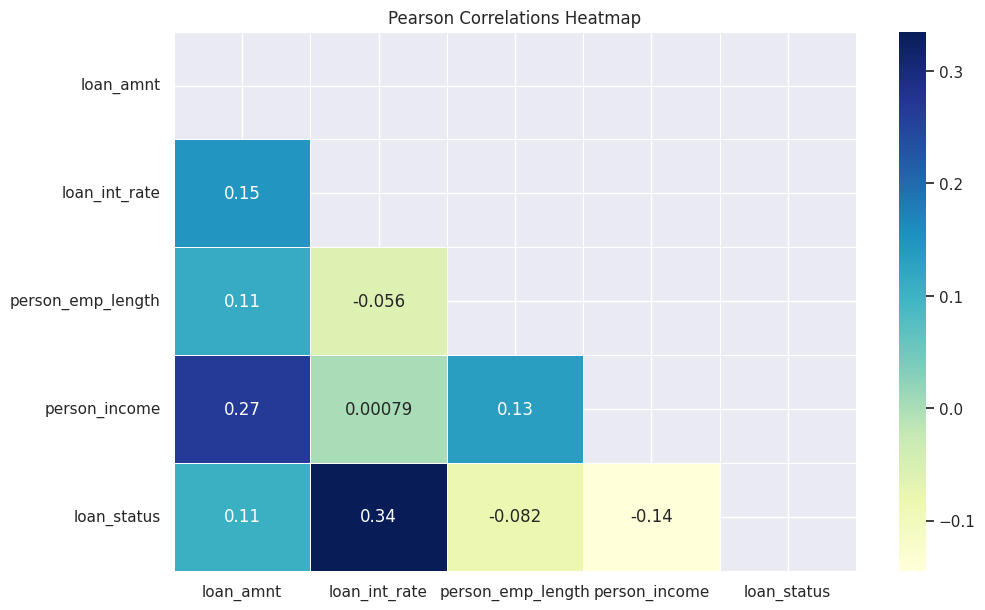

In [ ]:
corr = credit_df[['loan_amnt', 'loan_int_rate', 'loan_grade', 'person_emp_length', 'person_home_ownership', 'person_income','loan_intent', 'loan_status']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

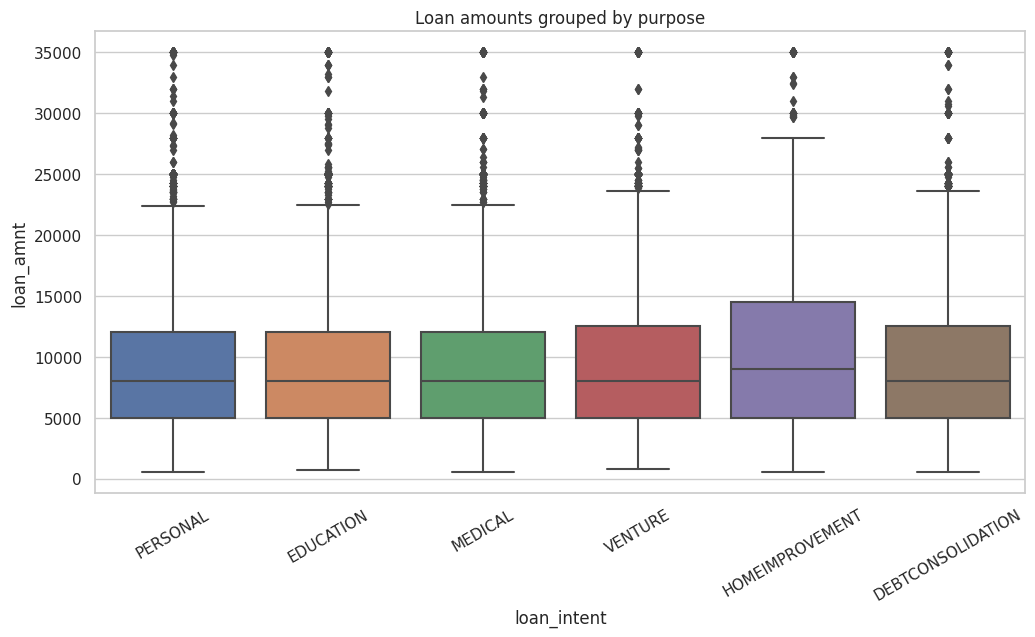

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='loan_intent', y='loan_amnt', data=credit_df)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

In [ ]:
credit_df1 = credit_df.drop(columns=['loan_amnt','loan_int_rate','loan_grade','person_emp_length','person_home_ownership','loan_percent_income','cb_person_default_on_file','loan_intent','cb_person_cred_hist_length'], axis=1)

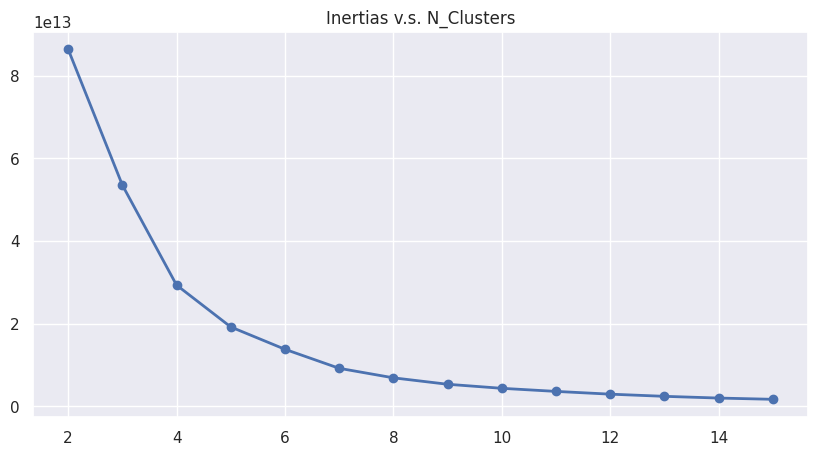

In [ ]:
## Clustering
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(credit_df1)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

In [ ]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(credit_df1)

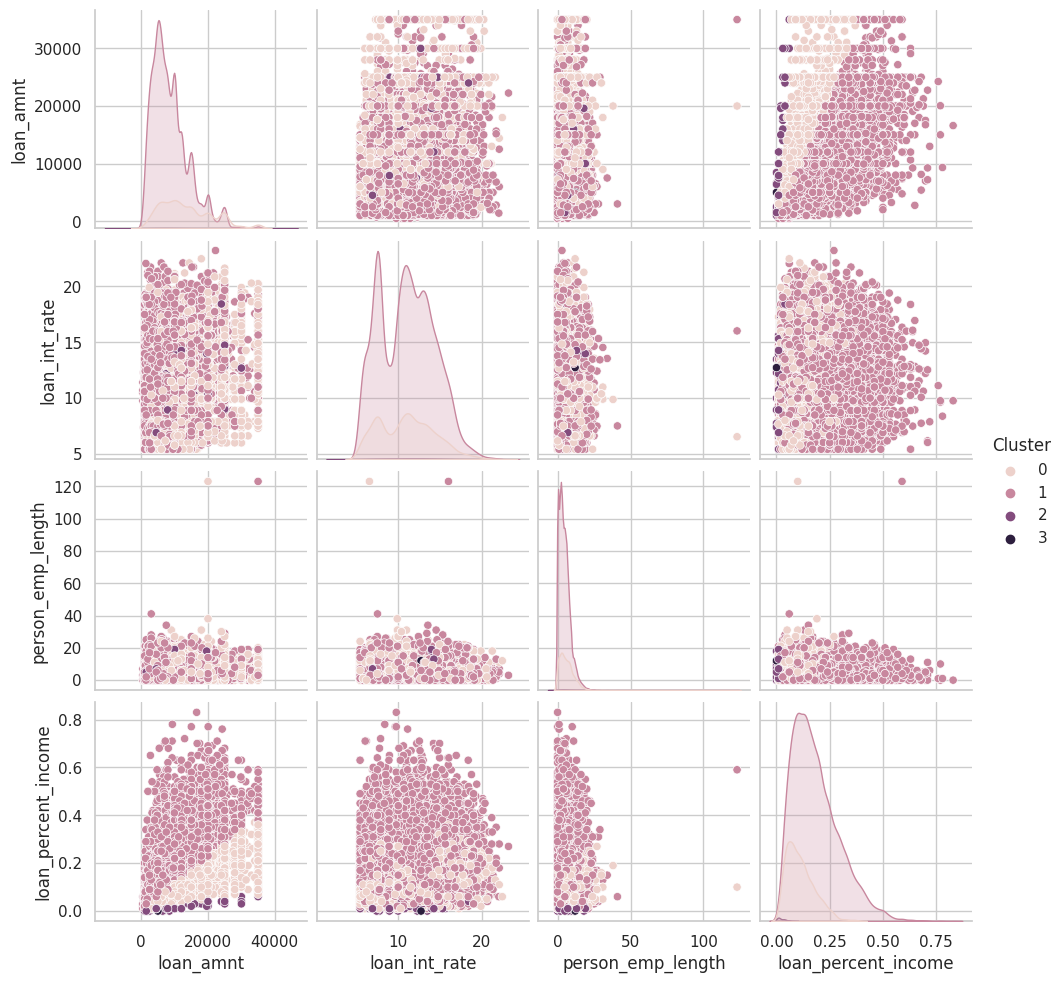

In [ ]:
df_clustered = credit_df[['loan_amnt', 'loan_int_rate', 'loan_grade', 'person_emp_length', 'person_home_ownership', 'loan_percent_income', 'loan_intent']]
df_clustered["Cluster"] = clusters
sns.pairplot(df_clustered[['loan_amnt', 'loan_int_rate', 'loan_grade', 'person_emp_length', 'person_home_ownership', 'loan_percent_income', 'loan_intent', "Cluster"]], hue="Cluster");

In [ ]:
y = credit_df['loan_status']
X = credit_df.drop(columns=['loan_status','loan_intent','loan_grade','person_home_ownership','loan_grade','cb_person_default_on_file','person_emp_length','loan_int_rate','loan_percent_income'],axis=1)
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [ ]:
 # Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [ ]:
# Review the features data
X.head()

,person_age,person_income,loan_amnt,cb_person_cred_hist_length
0,22,59000,35000,3
1,21,9600,1000,2
2,25,9600,5500,3
3,23,65500,35000,2
4,24,54400,35000,4


In [ ]:
 # Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 4
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
l# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [ ]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      6360
           1       0.54      0.38      0.44      1786

    accuracy                           0.79      8146
   macro avg       0.69      0.64      0.66      8146
weighted avg       0.77      0.79      0.78      8146

